In [1]:
import os
os.getcwd()

'c:\\Users\\hoota\\Documents\\Master\\Kaggle\\Power_Transformers_Health_Condition_Dataset\\UI\\PublicDatasetUI'

In [2]:
# importing libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

In [3]:
# reading the csv file into a dataframe
tfr_data=pd.read_csv('Health index2.csv')

In [4]:
#extracting the first 5 columns of the dataframe
tfr_data.head(5)

,Hydrogen,Oxigen,Nitrogen,Methane,CO,CO2,Ethylene,Ethane,Acethylene,DBDS,Power factor,Interfacial V,Dielectric rigidity,Water content,Health index
0,2845,5860,27842,7406,32,1344,16684,5467,7,19.0,1.00,45,55,0,95.2
1,12886,61,25041,877,83,864,4,305,0,45.0,1.00,45,55,0,85.5
2,2820,16400,56300,144,257,1080,206,11,2190,1.0,1.00,39,52,11,85.3
3,1099,70,37520,545,184,1402,6,230,0,87.0,4.58,33,49,5,85.3
4,3210,3570,47900,160,360,2130,4,43,4,1.0,0.77,44,55,3,85.2


In [5]:
print(f'The dataset has {tfr_data.shape[0]} rows and {tfr_data.shape[1]} columns')

The dataset has 470 rows and 15 columns


In [6]:
Condition = []
for row in tfr_data['Health index']:
    if row > 20 and row <=100:
        Condition.append('Not-failed')
    elif row >= 0 and row <=20:
        Condition.append('failed')
    else:
        Condition.append(Nan)

In [7]:
tfr_data['Condition'] = Condition

In [8]:
tfr_data.head()

,Hydrogen,Oxigen,Nitrogen,Methane,CO,CO2,Ethylene,Ethane,Acethylene,DBDS,Power factor,Interfacial V,Dielectric rigidity,Water content,Health index,Condition
0,2845,5860,27842,7406,32,1344,16684,5467,7,19.0,1.00,45,55,0,95.2,Not-failed
1,12886,61,25041,877,83,864,4,305,0,45.0,1.00,45,55,0,85.5,Not-failed
2,2820,16400,56300,144,257,1080,206,11,2190,1.0,1.00,39,52,11,85.3,Not-failed
3,1099,70,37520,545,184,1402,6,230,0,87.0,4.58,33,49,5,85.3,Not-failed
4,3210,3570,47900,160,360,2130,4,43,4,1.0,0.77,44,55,3,85.2,Not-failed


In [9]:
tfr_data.drop(columns=['Health index'],axis=1,inplace=True)

In [10]:
tfr_data.head()

,Hydrogen,Oxigen,Nitrogen,Methane,CO,CO2,Ethylene,Ethane,Acethylene,DBDS,Power factor,Interfacial V,Dielectric rigidity,Water content,Condition
0,2845,5860,27842,7406,32,1344,16684,5467,7,19.0,1.00,45,55,0,Not-failed
1,12886,61,25041,877,83,864,4,305,0,45.0,1.00,45,55,0,Not-failed
2,2820,16400,56300,144,257,1080,206,11,2190,1.0,1.00,39,52,11,Not-failed
3,1099,70,37520,545,184,1402,6,230,0,87.0,4.58,33,49,5,Not-failed
4,3210,3570,47900,160,360,2130,4,43,4,1.0,0.77,44,55,3,Not-failed


In [11]:
tfr_data['Condition'].value_counts()

Condition
failed        263
Not-failed    207
Name: count, dtype: int64

# Data Preprocessing

In [12]:
# Missing Values
tfr_data.isnull().sum()

Hydrogen               0
Oxigen                 0
Nitrogen               0
Methane                0
CO                     0
CO2                    0
Ethylene               0
Ethane                 0
Acethylene             0
DBDS                   0
Power factor           0
Interfacial V          0
Dielectric rigidity    0
Water content          0
Condition              0
dtype: int64

No null values

In [13]:
tfr_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 470 entries, 0 to 469
Data columns (total 15 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Hydrogen             470 non-null    int64  
 1   Oxigen               470 non-null    int64  
 2   Nitrogen             470 non-null    int64  
 3   Methane              470 non-null    int64  
 4   CO                   470 non-null    int64  
 5   CO2                  470 non-null    int64  
 6   Ethylene             470 non-null    int64  
 7   Ethane               470 non-null    int64  
 8   Acethylene           470 non-null    int64  
 9   DBDS                 470 non-null    float64
 10  Power factor         470 non-null    float64
 11  Interfacial V        470 non-null    int64  
 12  Dielectric rigidity  470 non-null    int64  
 13  Water content        470 non-null    int64  
 14  Condition            470 non-null    object 
dtypes: float64(2), int64(12), object(1)
memo

In [14]:
tfr_data.describe()

,Hydrogen,Oxigen,Nitrogen,Methane,CO,CO2,Ethylene,Ethane,Acethylene,DBDS,Power factor,Interfacial V,Dielectric rigidity,Water content
count,470.000000,470.000000,470.000000,470.000000,470.000000,470.000000,470.000000,470.000000,470.000000,470.000000,470.000000,470.000000,470.000000,470.000000
mean,404.261702,8357.372340,47759.561702,79.695745,244.000000,1816.414894,162.923404,81.940426,91.491489,17.036596,1.849043,38.434043,53.495745,16.282979
std,2002.142678,14164.233283,13760.451816,489.320336,237.267485,2256.790519,1323.811504,342.573636,644.365828,46.735057,6.144009,6.178830,6.458906,17.115646
min,0.000000,57.000000,3600.000000,0.000000,10.000000,48.000000,0.000000,0.000000,0.000000,0.000000,0.050000,21.000000,27.000000,0.000000
25%,4.000000,496.000000,41700.000000,2.000000,66.000000,641.750000,0.000000,0.000000,0.000000,0.000000,0.570000,32.000000,51.000000,5.000000
50%,9.000000,3810.000000,49100.000000,3.000000,150.500000,1125.000000,3.000000,4.000000,0.000000,0.000000,1.000000,39.000000,54.000000,12.000000
75%,34.000000,14875.000000,55875.000000,7.000000,361.750000,2257.500000,6.000000,69.750000,0.000000,2.000000,1.000000,44.000000,56.000000,21.000000
max,23349.000000,249900.000000,85300.000000,7406.000000,1730.000000,24900.000000,16684.000000,5467.000000,9740.000000,227.000000,73.200000,57.000000,75.000000,183.000000


# EDA

<Axes: xlabel='Condition', ylabel='Count'>

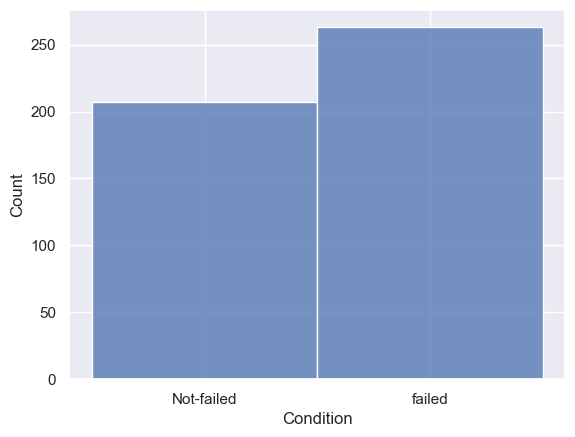

In [15]:
sns.set_theme(style='darkgrid')
sns.histplot(x='Condition',data=tfr_data,stat='count',bins=10)

In [16]:
# Encoding Concept
tfr_data['Condition'] = tfr_data['Condition'].astype('category')
tfr_data['Condition'] = tfr_data['Condition'].cat.codes

In [17]:
tfr_data.head()

,Hydrogen,Oxigen,Nitrogen,Methane,CO,CO2,Ethylene,Ethane,Acethylene,DBDS,Power factor,Interfacial V,Dielectric rigidity,Water content,Condition
0,2845,5860,27842,7406,32,1344,16684,5467,7,19.0,1.00,45,55,0,0
1,12886,61,25041,877,83,864,4,305,0,45.0,1.00,45,55,0,0
2,2820,16400,56300,144,257,1080,206,11,2190,1.0,1.00,39,52,11,0
3,1099,70,37520,545,184,1402,6,230,0,87.0,4.58,33,49,5,0
4,3210,3570,47900,160,360,2130,4,43,4,1.0,0.77,44,55,3,0


In [18]:
# Handling Imbalance data
tfr_data['Condition'].value_counts()

Condition
1    263
0    207
Name: count, dtype: int64

## Definig X and Y (Balanced Dataset)

In [19]:
# separating the independent and dependent variables
x = tfr_data.iloc[:,0:10].values
y = tfr_data.iloc[:,-1].values

In [20]:
x[0:5,:]

array([[2.8450e+03, 5.8600e+03, 2.7842e+04, 7.4060e+03, 3.2000e+01,
        1.3440e+03, 1.6684e+04, 5.4670e+03, 7.0000e+00, 1.9000e+01],
       [1.2886e+04, 6.1000e+01, 2.5041e+04, 8.7700e+02, 8.3000e+01,
        8.6400e+02, 4.0000e+00, 3.0500e+02, 0.0000e+00, 4.5000e+01],
       [2.8200e+03, 1.6400e+04, 5.6300e+04, 1.4400e+02, 2.5700e+02,
        1.0800e+03, 2.0600e+02, 1.1000e+01, 2.1900e+03, 1.0000e+00],
       [1.0990e+03, 7.0000e+01, 3.7520e+04, 5.4500e+02, 1.8400e+02,
        1.4020e+03, 6.0000e+00, 2.3000e+02, 0.0000e+00, 8.7000e+01],
       [3.2100e+03, 3.5700e+03, 4.7900e+04, 1.6000e+02, 3.6000e+02,
        2.1300e+03, 4.0000e+00, 4.3000e+01, 4.0000e+00, 1.0000e+00]])

In [21]:
y[0:5]

array([0, 0, 0, 0, 0], dtype=int8)

In [22]:
# Splitting data into train and test data
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test=train_test_split(x, y, train_size=0.7, random_state=150, stratify=y)

print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(329, 10)
(141, 10)
(329,)
(141,)


In [23]:
# feature scaling
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
x_train = sc.fit_transform(x_train)
x_test = sc.transform(x_test)

### XGBoost Model

In [24]:
from xgboost import XGBClassifier
xgb = XGBClassifier(n_estimators = 100)
xgb.fit(x_train,y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=100, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)

In [25]:
y_pred_train_xgb=xgb.predict(x_train)
y_pred_test_xgb=xgb.predict(x_test)

In [26]:
y_pred_test_xgb

array([1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0,
       1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1,
       0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1,
       0, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 0, 1,
       1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1,
       1, 1, 0, 1, 0, 1, 1, 1, 1])

In [27]:
from sklearn.metrics import accuracy_score
print("Accuracy score of training dataset:",accuracy_score(y_train,y_pred_train_xgb))
print("Accuracy score of test dataset:",accuracy_score(y_test,y_pred_test_xgb))

Accuracy score of training dataset: 1.0
Accuracy score of test dataset: 0.8368794326241135


In [28]:
# test scoring
from sklearn.metrics import confusion_matrix
score_2 = confusion_matrix(y_test, y_pred_test_xgb)
score_2

array([[46, 16],
       [ 7, 72]], dtype=int64)

In [29]:
(score_2[1][1])/(score_2[1][0]+score_2[1][1])

0.9113924050632911

In [30]:
from sklearn.metrics import classification_report
print(classification_report(y_test,y_pred_test_xgb))

              precision    recall  f1-score   support

           0       0.87      0.74      0.80        62
           1       0.82      0.91      0.86        79

    accuracy                           0.84       141
   macro avg       0.84      0.83      0.83       141
weighted avg       0.84      0.84      0.83       141



### Pickling the Model File for Deployment

In [31]:
import pickle

In [32]:
pickle.dump(xgb,open('XGBoostModel.pkl','wb'))

In [33]:
pickle_model = pickle.load(open('XGBoostModel.pkl','rb'))

In [34]:
x_test[0]

array([-0.18936246,  0.54742232, -0.15928636, -0.14640949,  1.01515138,
       -0.12586854, -0.11605877, -0.22563237, -0.14278375, -0.37375383])

In [35]:
x_test[0].shape

(10,)

In [36]:
x_test[0].shape[-1]

10

In [37]:
a = x_test[0].reshape(1, -1)

In [38]:
a.shape

(1, 10)

In [39]:
pickle_model.predict(a)

array([1])